<a href="https://colab.research.google.com/github/hatchdavid1/Earthquakes/blob/master/Datos_CDMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd
url = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=b23a7eb4-3a3e-4a19-bd06-83d18a002ff2&limit=50000'  
response_API = requests.get(url)
print(response_API.status_code)

200


In [2]:
data = response_API.text
dic = json.loads(data)

In [3]:
results = dic.get('result')
fields = results.get('fields')
records = results.get('records')

In [4]:
cols = [i.get('id') for i in fields]
afluencia = pd.DataFrame(records)
afluencia.tail()

,_id,FECHA,TIPO_INGRESO,LINEA_1,LINEA_2,LINEA_3,LINEA_4,LINEA_5,LINEA_6,LINEA_7,LINEA_8,LINEA_9,LINEA_A,LINEA_B,LINEA_12
11139,11140,2022-01-27T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9810.0,0.0,0.0,0.0
11140,11141,2022-01-28T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11255.0,0.0,0.0,0.0
11141,11142,2022-01-29T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9145.0,0.0,0.0,0.0
11142,11143,2022-01-30T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5230.0,0.0,0.0,0.0
11143,11144,2022-01-31T00:00:00,QR/Validador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11120.0,0.0,0.0,0.0


In [5]:
url_zonas = 'https://datos.cdmx.gob.mx/api/3/action/datastore_search?resource_id=4f23c6c5-1b2b-410e-8589-a720d7b3db58&limit=10000'
response_api_zonas = requests.get(url_zonas)
data_zonas = response_api_zonas.text
dic_zonas = json.loads(data_zonas)
results_zonas = dic_zonas.get('result')
records_zonas = results_zonas.get('records')
zonas_riesgo = pd.DataFrame(records_zonas)
zonas_riesgo.head()

,_id,id,geo_point_2d,geo_shape,fenomeno,taxonomia,r_p_v_e,intensidad,descripcio,fuente,cvegeo,alcaldia,entidad,area_m2,perime_m,int2
0,1,1411,"19.4774588726,-99.214475378","{""type"": ""Polygon"", ""coordinates"": [[[-99.2139...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900200010608,Azcapotzalco,Ciudad de México,177118.764865,2461.440128,3
1,2,1414,"19.4840766322,-99.0979827502","{""type"": ""Polygon"", ""coordinates"": [[[-99.0973...",Geológicos,Sísmico,Peligro,Muy Alto,AGEB localizado en las regiones donde antiguam...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900500011487,Gustavo A. Madero,Ciudad de México,137484.944478,1753.723791,5
2,3,1422,"19.5219195307,-99.1340171776","{""type"": ""Polygon"", ""coordinates"": [[[-99.1337...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900500012841,Gustavo A. Madero,Ciudad de México,84091.291297,1217.219854,3
3,4,1444,"19.3139677776,-99.1267177657","{""type"": ""Polygon"", ""coordinates"": [[[-99.1249...",Geológicos,Sísmico,Peligro,Muy Alto,AGEB localizado en las regiones donde antiguam...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900300010893,Coyoacán,Ciudad de México,271118.866925,2108.201526,5
4,5,1450,"19.3107975267,-99.1707434555","{""type"": ""Polygon"", ""coordinates"": [[[-99.1719...",Geológicos,Sísmico,Peligro,Medio,AGEB localizado en las partes más altas de la ...,"Dirección de Análisis de Riesgo de la SPCGIR, ...",0900300011567,Coyoacán,Ciudad de México,69468.042776,1072.146834,3


In [7]:
!pip install geopandas
import geopandas
from shapely.geometry import Point, Polygon
df_shp = geopandas.GeoDataFrame(zonas_riesgo)
df_shp.rename(columns = {'geo_shape':'geometry'}, inplace = True)
type(df_shp)

     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 41.5 MB/s 
     |████████████████████████████████| 16.7 MB 459 kB/s 


geopandas.geodataframe.GeoDataFrame

In [8]:
df_shp[['lat', 'long']] = df_shp['geo_point_2d'].str.split(',', 1, expand=True)
df_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           4908 non-null   int64  
 1   id            4908 non-null   int64  
 2   geo_point_2d  4908 non-null   object 
 3   geometry      4908 non-null   object 
 4   fenomeno      4908 non-null   object 
 5   taxonomia     4908 non-null   object 
 6   r_p_v_e       4908 non-null   object 
 7   intensidad    4908 non-null   object 
 8   descripcio    4908 non-null   object 
 9   fuente        4908 non-null   object 
 10  cvegeo        4908 non-null   object 
 11  alcaldia      4908 non-null   object 
 12  entidad       4908 non-null   object 
 13  area_m2       4908 non-null   float64
 14  perime_m      4908 non-null   float64
 15  int2          4908 non-null   int64  
 16  lat           4908 non-null   object 
 17  long          4908 non-null   object 
dtypes: float64(2), int64

In [9]:
# To get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


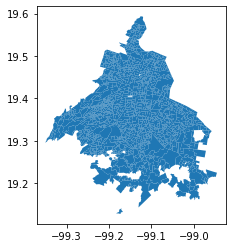

In [10]:
colonias = geopandas.read_file('/content/drive/MyDrive/Códigos_Python/Proyectos/coloniascdmx.shp', )
#colonias.crs = "epsg:4832"
colonias.plot()

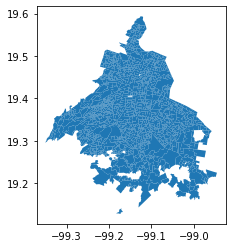

In [11]:
colonias.set_crs(epsg = 2163, inplace = True).plot()

In [12]:
crs = {'init':'EPSG:2163'}
df_shp['lat'] = df_shp['lat'].astype(float)
df_shp['long'] = df_shp['long'].astype(float)
geometry = [Point(xy) for xy in zip(df_shp['long'], df_shp['lat'])]
geo_df = geopandas.GeoDataFrame(df_shp, 
                          crs = crs, 
                          geometry = geometry)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Puntos CDMX')

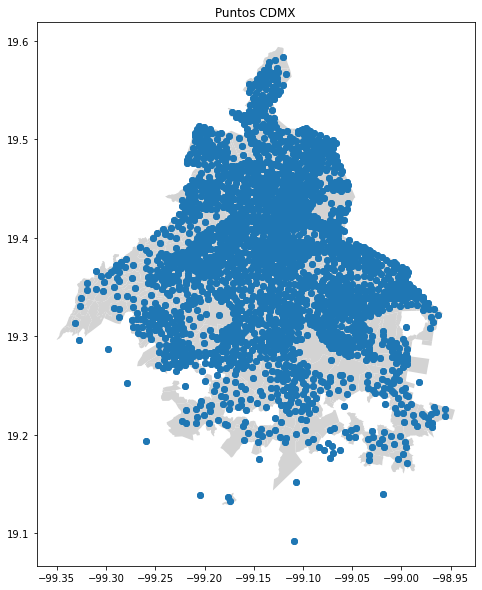

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
colonias.to_crs(epsg=2163).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('Puntos CDMX')

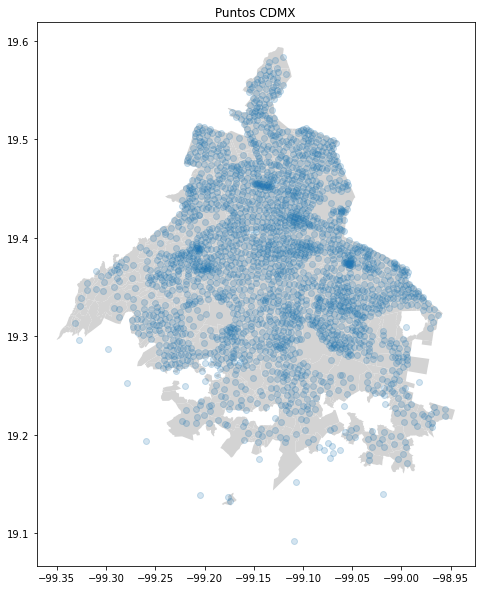

In [18]:
fig, ax = plt.subplots(figsize = (10,10))
colonias.to_crs(epsg=2163).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, alpha = .1 )
ax.set_title('Puntos CDMX')
plt.savefig('Property Map')

In [20]:
geo_df['intensidad_1'] = np.where(geo_df.intensidad)

Muy Alto    2004
Medio       1930
Alto         974
Name: intensidad, dtype: int64